0 z=0
1 z=a_cmp
2 z=a_l1
3 z=a_l2
4 z=a_l3
5 z=a_l4
6 z=a_m2
7 z=a_m3
8 z=a_m4
9 z=a_m5
10 z=a_m6
11 z=b_l1
12 z=b_l2
13 z=b_l3
14 z=b_l4
15 z=b_m2
16 z=b_m3
17 z=b_m4
18 z=b_m5
19 z=b_m6
20 z=midptl2m3
21 z=midptl4cmp
22 z=midptm3m4
23 z=midptm5m6
['midptl2m3', 'midptl4cmp', 'midptm3m4', 'midptm5m6']
['a_l1', 'a_l2', 'a_l3', 'a_l4', 'b_l1', 'b_l2', 'b_l3', 'b_l4']
['a_m2', 'a_m3', 'a_m4', 'a_m5', 'a_m6', 'b_m2', 'b_m3', 'b_m4', 'b_m5', 'b_m6']
raleigh range of l3 (mm):
130.8996939
beam size before the lens (mm): 
4.4888200351


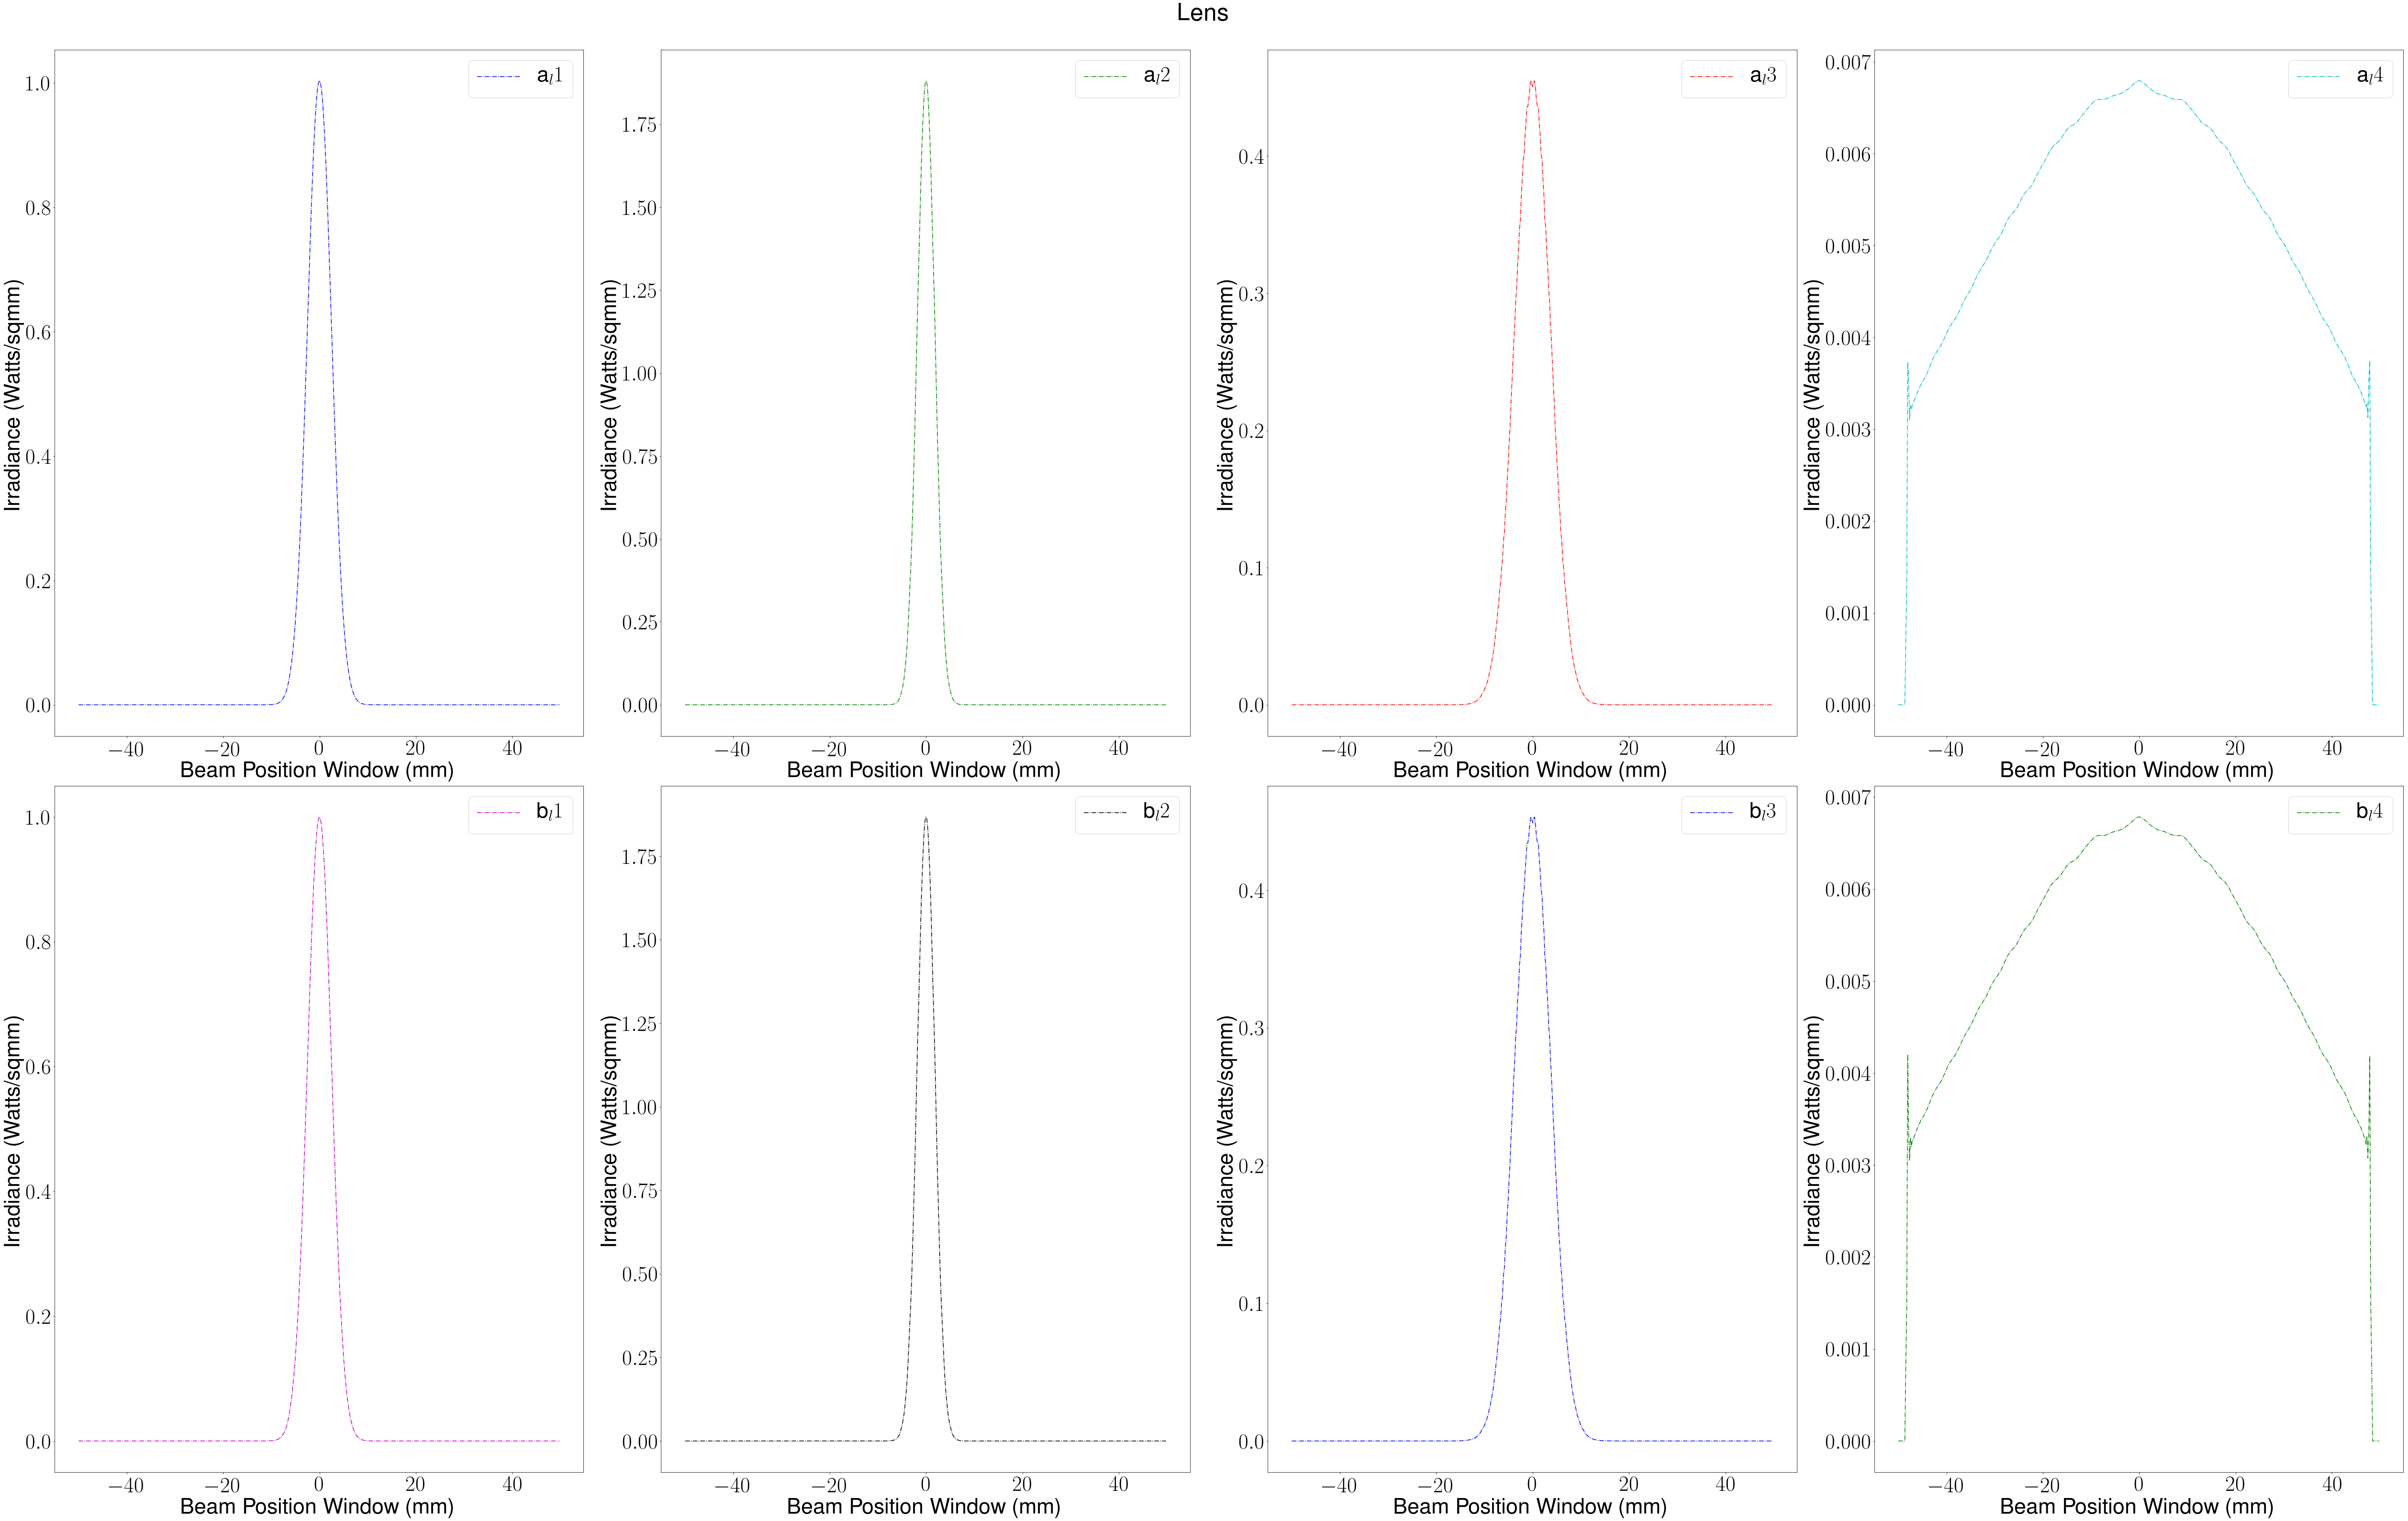

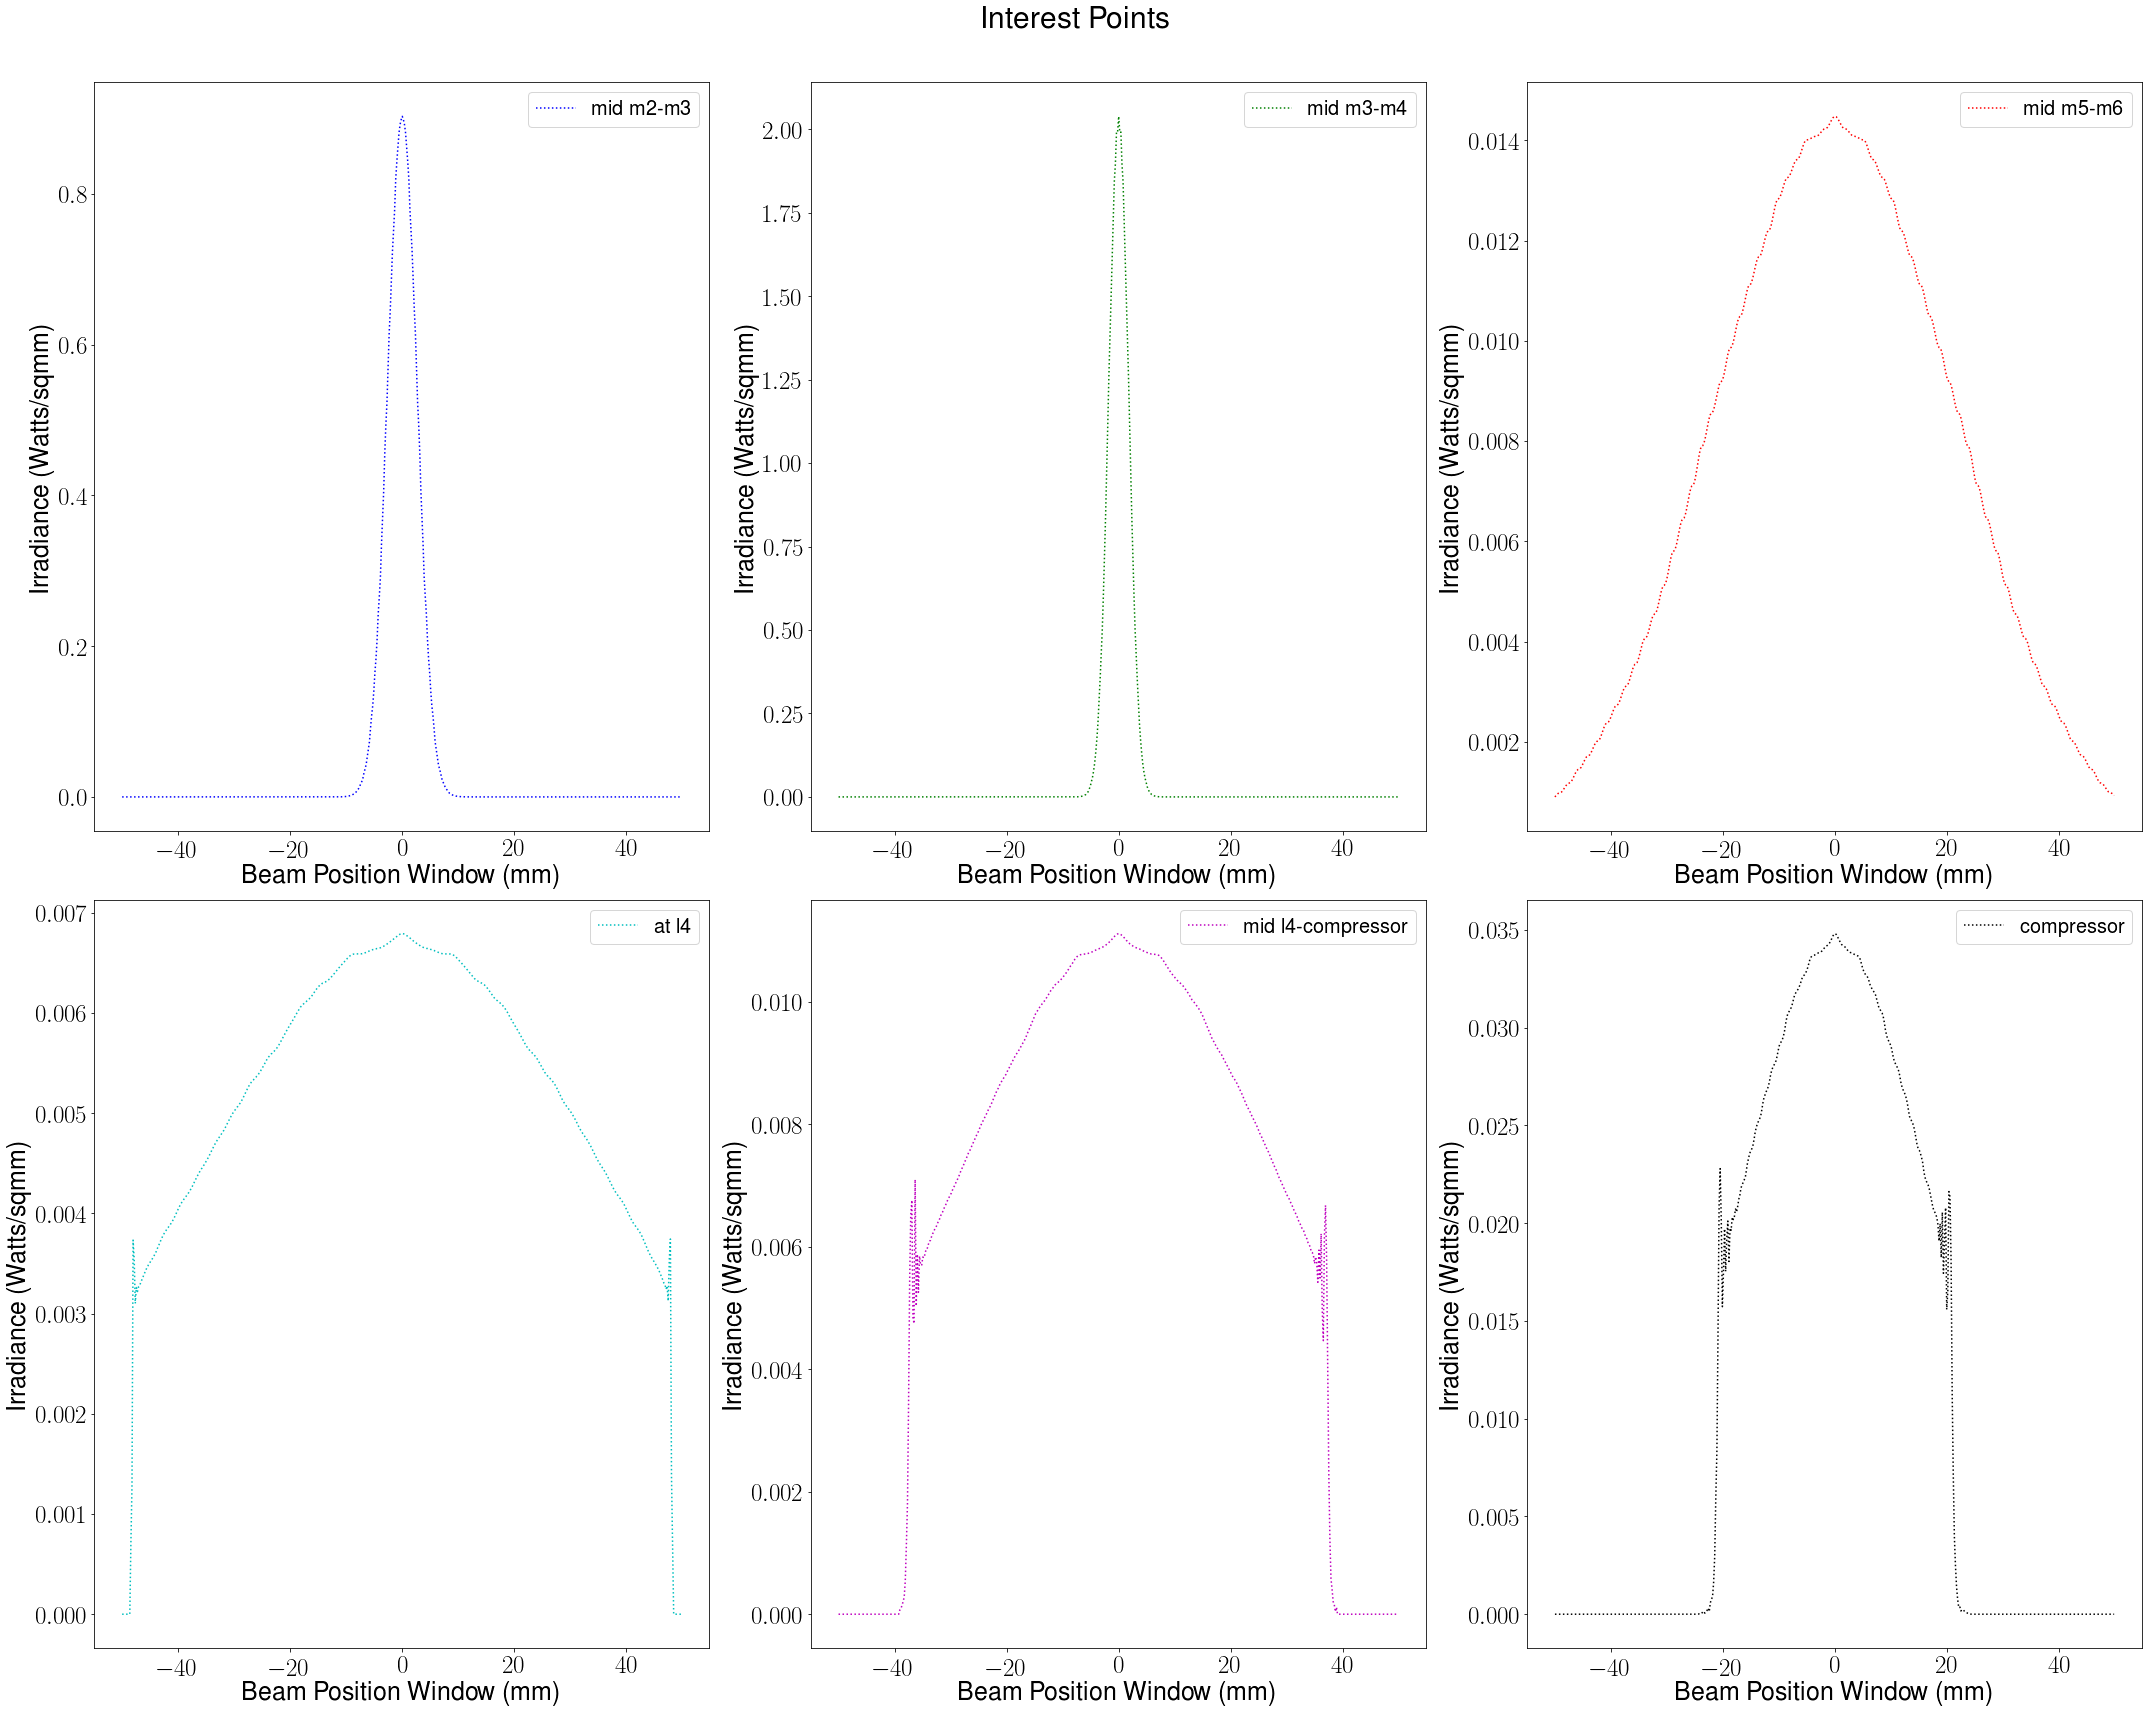

In [100]:
import getpass
import pandas as pd
import subprocess
from subprocess import Popen, PIPE
import os
import glob
import time
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['text.usetex']=True
matplotlib.rcParams['text.latex.unicode']=True
%matplotlib inline
def set_work_env():
    curr_username = getpass.getuser()
    if curr_username == 'segura':
        transport_data_path = '/Users/' + curr_username + '/Desktop/slac_codes/slacecodes/transport_model/data'
        %run '/Users/segura/Desktop/slac_codes/slacecodes/utilities.ipynb'
    else:
        transport_data_path = '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/transport_model/data'
        %run '/Users/eseguraca.6/Desktop/SLACfiles/slacecodes/utilities.ipynb'
    return(transport_data_path)

curr_env = set_work_env()

curr_path_obj = Popen(["pwd"], stdout=PIPE, stderr=PIPE)
crr_path = curr_path_obj.communicate()[0].decode('utf-8').rstrip()

sorted(os.listdir(crr_path))

def datapaths_generator(current_path):
    #create array to hold variables 
    arr_files = []
    name_files = []
    process = subprocess.Popen(['ls'], cwd=current_path, stdout=PIPE, stderr=PIPE)
    out, err = process.communicate()
    list_out = str(out.decode('utf-8')).split('\n')
    for i in list_out:
        if '.csv' in i:
            arr_files.append(current_path+'/'+i)
            name_files.append(str(i).rstrip('.csv'))
    #arr_files.reverse()
    #name_files.reverse()
    return(arr_files, name_files)

file_paths = datapaths_generator(crr_path)
data_array_list = data_generator(file_paths[0])

data_order = []

for i in range(len(file_paths[1])):
    data_order.append(file_paths[1][i].replace('dataat', ''))

for i in range(len(data_order)):
    print(i, data_order[i])
    
lens_labels = []
mirror_labels = []
mid_labels = []
for f_p in file_paths[1]:
    if 'z=a_l'in f_p: 
        lens_labels.append(f_p.replace('dataatz=', ''))
    if 'z=b_l'in f_p:
        lens_labels.append(f_p.replace('dataatz=', ''))
    if 'z=a_m' in f_p:
        mirror_labels.append(f_p.replace('dataatz=', ''))
    if 'z=b_m' in f_p:
        mirror_labels.append(f_p.replace('dataatz=', ''))
    if 'z=midpt' in f_p:
        mid_labels.append(f_p.replace('dataatz=', ''))
print(mid_labels)

lens_data = []
mirror_data = []
mid_data = []
print(lens_labels)
print(mirror_labels)
for i in range(len(file_paths[1])):
    if 'z=a_l' in file_paths[1][i]:
        # (x, irr)
        lens_data.append(data_array_list[i])
    if 'z=b_l' in file_paths[1][i]:
        # (x, irr)
        lens_data.append(data_array_list[i]) 
    if 'z=a_m' in file_paths[1][i]:
        # (x, irr)
        mirror_data.append(data_array_list[i])    
    if 'z=b_m' in file_paths[1][i]:
        # (x, irr)
        mirror_data.append(data_array_list[i])  
    if 'z=midpt' in file_paths[1][i]:
        # (x, irr)
        mid_data.append(data_array_list[i])     

#points of interest 
#at l4, mid l4-compressor, at compressor, mid m5-m6, mid m2-m3
#l2-m3, m3-m4, m5-m6, l4, mid l4-compressor, compressor 

pts_interest = ['mid m2-m3', 'mid m3-m4', 'mid m5-m6', 'at l4', 'mid l4-compressor', 'compressor']
data_pts_interest = [mid_data[0], mid_data[2], mid_data[3], lens_data[3], mid_data[1], data_array_list[1]] 


plot_generator(lens_data, 2, 4, 
               70, 45,
              0.95, 45, 45, 45, 'Beam Position Window (mm)','Irradiance (Watts/sqmm)',
              'Lens', lens_labels, 'lensat100x100')




f = plt.figure(figsize=(30,35))
cycol = cycle('bgrcmk')
for i in range(len(data_pts_interest)):
    ax = f.add_subplot(3,3, i+1)
    ax.plot(data_pts_interest[i][0], data_pts_interest[i][1], c= next(cycol), linestyle = ':', label = pts_interest[i])
    ax.set_xlabel('Beam Position Window (mm)', fontsize=25)
    ax.set_ylabel('Irradiance (Watts/sqmm)', fontsize=25)
    ax.tick_params(axis='both',labelsize=25)
    ax.legend(loc = 'upper right', fontsize=20)

f.suptitle('Interest Points', fontsize=30)
f.tight_layout()
f.subplots_adjust(top=0.95)
f.savefig('pts.jpg', dp1=1600)

print("raleigh range of l3 (m):")
print(raleigh_range(5,3 600) / 1000)
print("beam size before the lens (mm): ")
print(lens_waist_size(11738.3,5, 600, 6200 ))